In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
FIG_SIZE = (8,4)
FONT_SIZE = 17
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [3]:
RESERVATION = 'RES130870'
if (SAVE_FIG):
    reservation_out_dir = '../outputs/' + RESERVATION + '/'
    if (not os.path.exists(reservation_out_dir)):
        os.mkdir(reservation_out_dir)

In [4]:
sla_periods = ['10', '30', '60']
sla_periods_over_budget = [13, 11, 10]
sla_periods_within_budget = [66, 84, 90]
sla_periods_under_budget = [21, 5, 0]

realloc_periods = ['0.25', '0.5', '1', '2']
realloc_periods_over_budget = [0, 0, 11, 20]
realloc_periods_within_budget = [95, 85, 84, 75]
realloc_periods_under_budget = [5, 15, 5, 5]

In [5]:
# Calculate the overhead of negotiation traffic for each SLA period

sla_periods_float = np.array([10, 30, 60])

#   'msg_type'      : The purpose of the message
#   'client_ip'     : Identifies the UE 
#   'negotiation_id': Identifies the SLA
#   'sla_period'    : Length of each incremental SLA
#   'service_type'  : Primary constraint of the SLA
#   'remote_ip'     : Remote end of the SLA traffic
#   'budgets'       : Requested performance values
#   'price'         : Cost of the SLA
#   'timestamp'     : Time of the message
#   'signature'     : Proof of the payment
cell_order_msg_size_bits = 2 + 32 + 16 + 8 + 4 + 32 + 128 + 32 + 64 + 64
pkt_header_size_bits = 40 * 8
msg_overhead_per_period_bits = 2 * (pkt_header_size_bits + cell_order_msg_size_bits)
msg_overhead_bps = msg_overhead_per_period_bits / sla_periods_float

In [6]:
# Calculate the overhead of control traffic for each reallocation peiod

realloc_peiods_float = np.array([0.25, 0.5, 1, 2])
scope_log_period_sec = 0.25
scope_log_size_bits = 124 * 8
prb_alloc_msg_size_bits = 5 * 8
num_log_lines_per_realloc = realloc_peiods_float / scope_log_period_sec
control_overhead_bits_per_period = num_log_lines_per_realloc * scope_log_size_bits + pkt_header_size_bits * 2 + prb_alloc_msg_size_bits
control_overhead_kbps = np.divide(control_overhead_bits_per_period, realloc_peiods_float) / 1e3

# plt.plot(realloc_periods, control_overhead_kbits_per_sec)

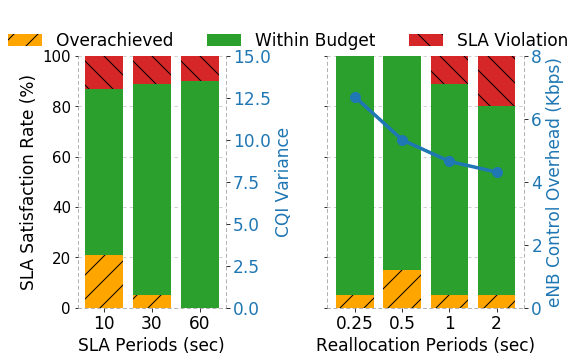

In [7]:
#@title
f, (a0, dummy, a1) = plt.subplots(1, 3, figsize=FIG_SIZE, 
                           gridspec_kw={'width_ratios': [3, 1, 4]}, sharey=True)

a0.bar(sla_periods, sla_periods_under_budget, color='orange', hatch='/')
a0.bar(sla_periods, sla_periods_within_budget, bottom=sla_periods_under_budget, 
       color='C2')
a0.bar(sla_periods, sla_periods_over_budget, 
       bottom=[i+j for i,j in zip(sla_periods_under_budget, sla_periods_within_budget)], 
       color='C3', hatch='\\')

a0.set_xlabel('SLA Periods (sec)', fontsize=FONT_SIZE)
for label in (a0.get_xticklabels()): 
  label.set_fontsize(FONT_SIZE)
a0.set_ylabel('SLA Satisfaction Rate (%)', fontsize=FONT_SIZE)
for label in (a0.get_yticklabels()): 
  label.set_fontsize(FONT_SIZE-2)
a0.set_axisbelow(True)
a0.grid(axis='y', alpha=0.75, linestyle=LINE_STYLE)
a0.spines['top'].set_visible(False)
a0.spines['right'].set_visible(False)

a2 = a0.twinx()  # instantiate a second axes that shares the same x-axis
a2_color = 'C0'
a2.set_ylabel('CQI Variance', color=a2_color, fontsize=FONT_SIZE)
# a2.plot(sla_periods, msg_overhead_bps, 
#         color=a2_color, linewidth=LINE_WIDTH, marker='o', markersize=10)
a2.tick_params(axis='y', labelcolor=a2_color, labelsize=FONT_SIZE)
a2.set_ylim((0, 15))
a2.spines['top'].set_visible(False)
a2.spines['left'].set_visible(False)
a2.spines['bottom'].set_visible(False)

a1.bar(realloc_periods, realloc_periods_under_budget, 
       color='orange', label='Overachieved', hatch='/')
a1.bar(realloc_periods, realloc_periods_within_budget, 
       bottom=realloc_periods_under_budget, color='C2', label='Within Budget')
a1.bar(realloc_periods, realloc_periods_over_budget, 
       bottom=[i+j for i,j in zip(realloc_periods_under_budget, realloc_periods_within_budget)], 
       color='C3', hatch='\\', label='SLA Violation')
a1.set_xlabel('Reallocation Periods (sec)', fontsize=FONT_SIZE)
for label in (a1.get_xticklabels()): 
  label.set_fontsize(FONT_SIZE)
a1.set_axisbelow(True)
a1.grid(axis='y', alpha=0.75, linestyle=LINE_STYLE)
# a1.spines['left'].set_visible(False)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a3_color = 'C0'
a3.set_ylabel('eNB Control Overhead (Kbps)', color=a3_color, fontsize=FONT_SIZE)
a3.plot(realloc_periods, control_overhead_kbps, 
        color=a3_color, linewidth=LINE_WIDTH, marker='o', markersize=10)
a3.tick_params(axis='y', labelcolor=a3_color, labelsize=FONT_SIZE)
a3.set_ylim((0, 8))
a3.spines['top'].set_visible(False)
a3.spines['left'].set_visible(False)
a3.spines['bottom'].set_visible(False)

a0.spines["right"].set_linestyle(LINE_STYLE)
a0.spines["right"].set_alpha(0.75)
a0.spines["right"].set_color('gray')
a0.spines["left"].set_linestyle(LINE_STYLE)
a0.spines["left"].set_alpha(0.75)
a0.spines["left"].set_color('gray')
a0.spines["top"].set_linestyle(LINE_STYLE)
a0.spines["top"].set_alpha(0.75)
a0.spines["top"].set_color('gray')
a0.spines["bottom"].set_linestyle(LINE_STYLE)
a0.spines["bottom"].set_alpha(0.75)
a0.spines["bottom"].set_color('gray')
a2.spines["right"].set_linestyle(LINE_STYLE)
a2.spines["right"].set_alpha(0.75)
a2.spines["right"].set_color('gray')
a2.spines["left"].set_linestyle(LINE_STYLE)
a2.spines["left"].set_alpha(0.75)
a2.spines["left"].set_color('gray')
a2.spines["top"].set_linestyle(LINE_STYLE)
a2.spines["top"].set_alpha(0.75)
a2.spines["top"].set_color('gray')
a2.spines["bottom"].set_linestyle(LINE_STYLE)
a2.spines["bottom"].set_alpha(0.75)
a2.spines["bottom"].set_color('gray')
a1.spines["right"].set_linestyle(LINE_STYLE)
a1.spines["right"].set_alpha(0.75)
a1.spines["right"].set_color('gray')
a1.spines["left"].set_linestyle(LINE_STYLE)
a1.spines["left"].set_alpha(0.75)
a1.spines["left"].set_color('gray')
a1.spines["top"].set_linestyle(LINE_STYLE)
a1.spines["top"].set_alpha(0.75)
a1.spines["top"].set_color('gray')
a1.spines["bottom"].set_linestyle(LINE_STYLE)
a1.spines["bottom"].set_alpha(0.75)
a1.spines["bottom"].set_color('gray')
a3.spines["right"].set_linestyle(LINE_STYLE)
a3.spines["right"].set_alpha(0.75)
a3.spines["right"].set_color('gray')
a3.spines["left"].set_linestyle(LINE_STYLE)
a3.spines["left"].set_alpha(0.75)
a3.spines["left"].set_color('gray')
a3.spines["top"].set_linestyle(LINE_STYLE)
a3.spines["top"].set_alpha(0.75)
a3.spines["top"].set_color('gray')
a3.spines["bottom"].set_linestyle(LINE_STYLE)
a3.spines["bottom"].set_alpha(0.75)
a3.spines["bottom"].set_color('gray')

dummy.axis('off')
dummy.spines['left'].set_visible(False)
dummy.spines['top'].set_visible(False)
dummy.spines['right'].set_visible(False)
dummy.spines['bottom'].set_visible(False)

f.legend(loc='upper center', frameon=False, fontsize=FONT_SIZE, ncol=3,
              bbox_to_anchor=[0.5,1.2])

plt.subplots_adjust(top=1.0)
# plt.tight_layout()

if (SAVE_FIG):
  plt.savefig(reservation_out_dir + 'parameters.pdf', bbox_inches='tight')
plt.show()